#**An Analysis of Residential Parking in Los Angeles**

---

By: *Pedram* *Bazargani*

**Data Description:** This data consists of real estate listings collected in the first 6 months in 2021. The listings include data on price, home type, city, ZIP code, parking, and county. The data was mined by Guenter Roehrich, a data scientist from Pangenda and was provided in csv format. The data was prepped and cleaned via the Alteryx Designer Platform. Tools utlized include the select and filter tools. The data was then outputed back into csv file format and loaded to this notebook on Google Colab.

**Source:** https://www.kaggle.com/datasets/yellowj4acket/real-estate-california

**Motivations:** Quality real estate data is often difficult to come by and when I found this data with a usuability score of 10 on Kaggle I was hooked! I hope to one day own real estate and any opportunity to see what the market is like even if it were a couple years ago is an amazing opportunity.

As anyone who lives in the Los Angeles Metropolitan area may know, residential parking may not be availiable with a real estate unit and due to the lack of public transportation infrastructure availiable, parking is often a necessity. I set off on this project to see what places in Los Angeles County, the city of Los Angeles, and ZIP codes within have residential parking availiable. I also analyzed real estate pricing in high parking areas is to gain insights on what the market currently looks and how it will behave in the future.

In [ ]:
#Importing Packages; Loading Data; Creating a DataFrame
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/cleanedvalues.csv')
df = pd.DataFrame(data)
print(df)

                    id            event    price  pricePerSquareFoot  \
0     91605-2069586184  Listed for sale   274950                 367   
1       91605-20000583  Listed for sale   645000                 548   
2       91605-19998959  Listed for sale  1200000                 516   
3       91605-19997810  Listed for sale   650000                 453   
4       91605-19996997  Listed for sale   749000                 643   
...                ...              ...      ...                 ...   
4571    90036-20778142  Listed for sale  2499999                   0   
4572    90036-20786230  Listed for sale  2399000                   0   
4573    90036-20608738  Listed for sale  2195000                 863   
4574    90036-20786205  Listed for sale  2249000                   0   
4575    90036-20785299  Listed for sale  2295000                   0   

                 city state  zipcode  parking       homeType  \
0     North Hollywood    CA    91605        1          CONDO   
1     N

In [ ]:
#Defining Column Names; Counting Properties With and Without Parking in LA County
columns = ["id", "event", "price", "pricePerSquareFoot", "city", "state",
    "zipcode", "parking", "homeType", "county"]

parking_counts = df["parking"].value_counts()

print("\nProperties with parking:", parking_counts[1])
print("Properties without parking:", parking_counts[0])
print("\n")


Properties with parking: 3493
Properties without parking: 1083




In [ ]:
#Counting Cities with Most/Least Properties with/without Parking
cities_most_parking = df[df["parking"] == 1]["city"].value_counts()
cities_least_without_parking = df[df["parking"] == 0]["city"].value_counts()

print("\nCities with the most properties with parking:")
print(cities_most_parking)

print("\nCities with the least properties without parking:")
print(cities_least_without_parking)


Cities with the most properties with parking:
Los Angeles      463
Long Beach       161
Pasadena         105
Santa Clarita     98
Whittier          86
                ... 
Culver Cty         1
Chino              1
Newhall            1
REDONDO BEACH      1
Val Verde          1
Name: city, Length: 141, dtype: int64

Cities with the least properties without parking:
Los Angeles     464
Santa Monica     49
Long Beach       32
Glendale         23
Van Nuys         18
               ... 
San Marino        1
Calabasas         1
Los angeles       1
Val Verde         1
Lomita            1
Name: city, Length: 109, dtype: int64


In [ ]:
#Counting Zipcodes (LA County) with Most/Least Properties with/without Parking
zipcodes_most_parking = df[df["parking"] == 1]["zipcode"].value_counts()
zipcodes_least_without_parking = df[df["parking"] == 0]["zipcode"].value_counts()

print("\nZip codes with the most properties with parking:")
print(zipcodes_most_parking)

print("\nZip codes with the least properties without parking:")
print(zipcodes_least_without_parking)


Zip codes with the most properties with parking:
91367    40
91006    34
91744    33
91011    31
90650    31
         ..
93544     1
90065     1
90014     1
90013     1
90033     1
Name: zipcode, Length: 268, dtype: int64

Zip codes with the least properties without parking:
90026    20
90011    19
90042    19
90036    18
90004    17
         ..
90716     1
91789     1
91340     1
90401     1
91767     1
Name: zipcode, Length: 218, dtype: int64


In [ ]:
#Counting Number of Properties with Parking within the City of Los Angeles (by Zipcode)
la_properties = df[df["city"] == "Los Angeles"]
la_zipcodes_most_parking = la_properties[la_properties["parking"] == 1]["zipcode"].value_counts()

print("\nCity of Los Angeles zip codes with the most properties with parking:")
print(la_zipcodes_most_parking)


City of Los Angeles zip codes with the most properties with parking:
90068    22
90027    18
90045    18
90032    17
90026    16
90049    15
90047    14
90066    14
90042    14
90046    13
90022    13
90016    13
90043    12
90044    11
90039    11
90031    11
90001    10
90002    10
90019    10
90064    10
90004    10
90025    10
90037     9
90018     9
90069     9
90035     9
90059     8
90024     8
90048     7
90034     7
90056     6
90230     6
90041     6
90020     6
90061     6
90003     5
90036     5
90011     5
90008     5
90006     4
90028     4
90062     4
90007     4
90731     4
90077     4
90094     4
90012     3
90038     3
90057     3
90023     3
90063     3
90029     3
90015     2
90005     2
90033     1
91344     1
90013     1
90065     1
90014     1
Name: zipcode, dtype: int64


In [ ]:
#Finding the Average Price of Properties within the City of Los Angeles in the Zip code with the Most Parking
most_parking_zipcode = la_zipcodes_most_parking.index[0]
properties_most_parking_zipcode = la_properties[la_properties["zipcode"] == most_parking_zipcode]
average_price_most_parking_zipcode = properties_most_parking_zipcode["price"].mean()

print("\n")
print(f"The average price of properties within the city of Los Angeles in the zip code {most_parking_zipcode} with the most parking is: ${average_price_most_parking_zipcode:.2f}")
print("\n")



The average price of properties within the city of Los Angeles in the zip code 90068 with the most parking is: $2049973.66




In [ ]:
#Finding the Average Price of Properties within the City of Los Angeles in the 'TOP 5' Zip codes with the Most Parking
la_zipcodes_most_parking = la_properties[la_properties["parking"] == 1]["zipcode"].value_counts()
top_5_parking_zipcodes = la_zipcodes_most_parking.index[:5]
properties_top_5_parking_zipcodes = la_properties[la_properties["zipcode"].isin(top_5_parking_zipcodes)]

average_prices = properties_top_5_parking_zipcodes.groupby("zipcode")["price"].mean()

print("\n")
print("Average prices of properties (in millions) in the top 5 zip codes with the most parking within the city of Los Angeles:")
print(average_prices)



Average prices of properties (in millions) in the top 5 zip codes with the most parking within the city of Los Angeles:
zipcode
90026    1.349333e+06
90027    2.527732e+06
90032    7.931848e+05
90045    1.440121e+06
90068    2.049974e+06
Name: price, dtype: float64


#**Visualizations**



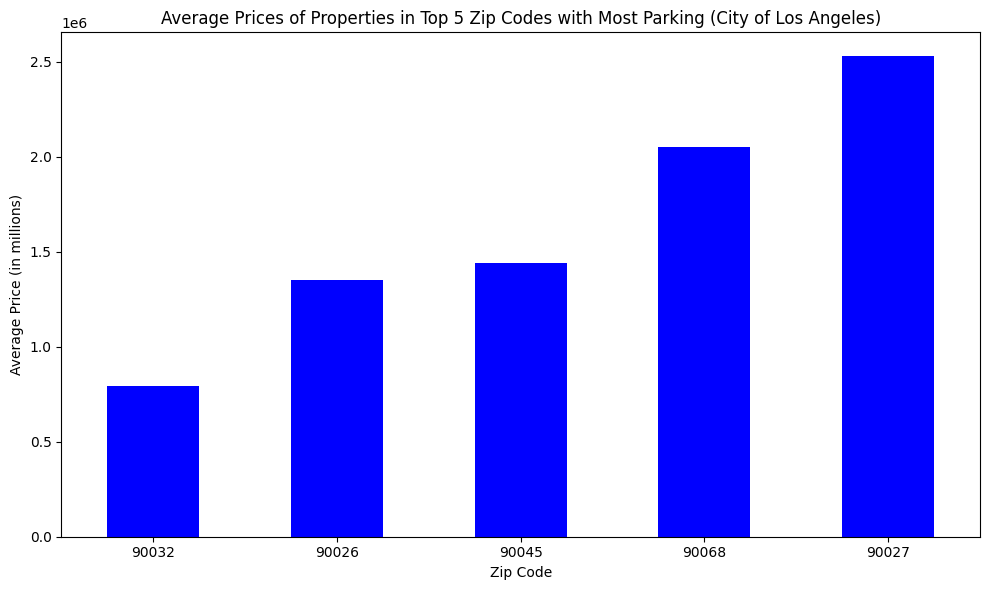

In [ ]:
#Average Prices of Properties in Top 5 ZIP Codes with Most Parking (City of Los Angeles)
plt.figure(figsize=(10, 6))
average_prices.sort_values(ascending=True).plot(kind="bar", color="blue")
plt.title("Average Prices of Properties in Top 5 Zip Codes with Most Parking (City of Los Angeles)")
plt.xlabel("Zip Code")
plt.ylabel("Average Price (in millions)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

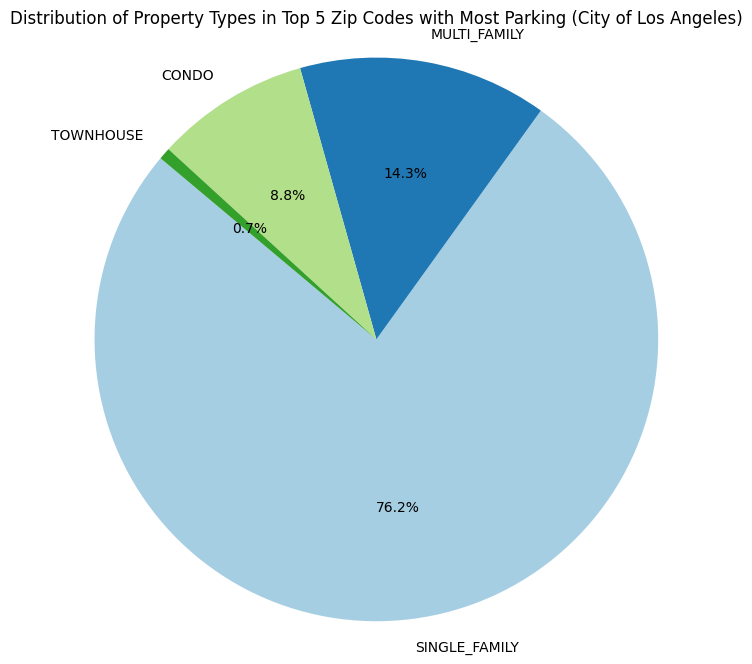

In [ ]:
#Defining property_type_counts; Displaying distribution of Property Types in Top 5 Zip Codes with Most Parking (City of Los Angeles)
la_zipcodes_most_parking = la_properties[la_properties["parking"] == 1]["zipcode"].value_counts()
top_5_parking_zipcodes = la_zipcodes_most_parking.index[:5]
properties_top_5_parking_zipcodes = la_properties[la_properties["zipcode"].isin(top_5_parking_zipcodes)]
property_type_counts = properties_top_5_parking_zipcodes["homeType"].value_counts() #could delete all except this

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Property Types in Top 5 Zip Codes with Most Parking (City of Los Angeles)")
plt.axis("equal") #for precision
plt.show()


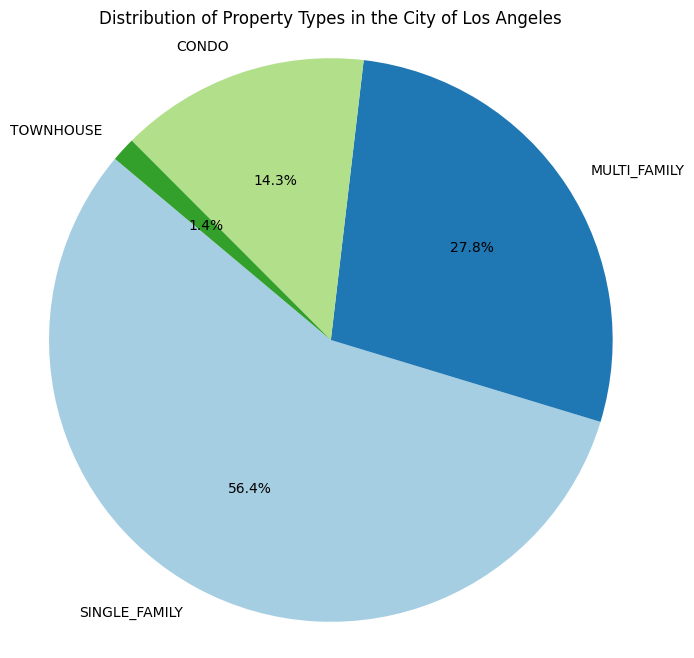

In [ ]:
#Displaying Distribution of Property Types in the City of Los Angeles
property_type_counts = la_properties["homeType"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Property Types in the City of Los Angeles")
plt.axis("equal") #for precision
plt.show()

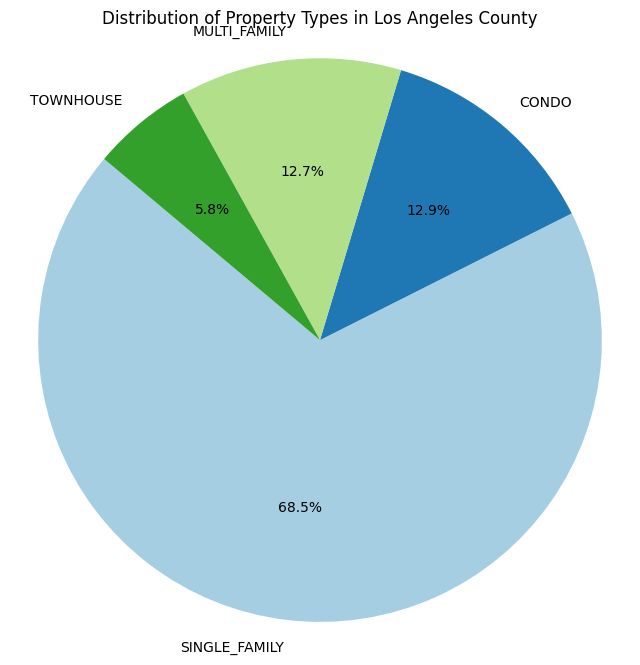

In [ ]:
#Displaying Distribution of Property Types in Los Angeles County
la_county_properties = df[df["county"] == "Los Angeles County"]
property_type_counts = la_county_properties["homeType"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Property Types in Los Angeles County")
plt.axis("equal") #for precision
plt.show()


**Implications for Developers:** Real estate developers could look at these insights and decide to center their projects in or near ZIP codes with high residential parking availability. Projects that may be successful in these low public transportation infrastructure areas could be malls, drive-thrus, and auto centers for vehicle maintenance and purchasing. On the flip side, this information could also be used by public infrastructure developers to bring more public transportation options and possibly minimize reliance on personal vehicle travel.